In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import quad
import numpy as np
import corner
import emcee

In [2]:
N =1000
z =np.linspace(0,5,N) 
z

array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

In [3]:
def R(z):
    if z <= 1.:
        return 1+2*z
    if z>1 and z<5:
        return (3./4.)*(5 - z)
    if z>=5:
        return 0.0
R(3.6)

1.0499999999999998

In [4]:
h = 0.6866
# valores em Hz^-1
MPC = 1.0293*10**(14)
M_solar = 4.92535*10**(-6)
#valor em Hz
H0 = (h/3000.)*MPC**(-1)
H0

2.2235176009585797e-18

In [5]:
Om_mat = 0.3059
w0 = -1.067
xi1 = 0.0002468
lambda_plus = -1 - (w0/2.)+np.sqrt(w0*(w0+4*xi1))
lambda_minus = -1 - (w0/2.)-np.sqrt(w0*(w0+4*xi1))
C_plus = 0.5*(1+(w0/np.sqrt(w0*(w0+4*xi1)))*(2*Om_mat-1))
C_minus =0.5*(1-(w0/np.sqrt(w0*(w0+4*xi1)))*(2*Om_mat-1))

def DC(zz):
    
    E = lambda zz : np.sqrt(C_plus*(1+zz)**(-3*lambda_plus)+C_minus*(1+zz)**(-3*lambda_minus))**(-1)
    
    result = quad(E, 0, zz)[0]
    return result

In [6]:
def E(z):
    return  np.sqrt(C_plus*(1+z)**(-3*lambda_plus)+C_minus*(1+z)**(-3*lambda_minus))
E(2.4)

9.227040866909078

In [7]:
def Psquare(z):
    return (4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
Psquare(2.2)

0.7979141498094823

In [8]:
Norm = quad(Psquare,0,5)[0]
(1./np.sqrt(Norm))

0.3289282603948187

In [9]:
def P(z):
    return (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
P(2.1)

0.32857275353499155

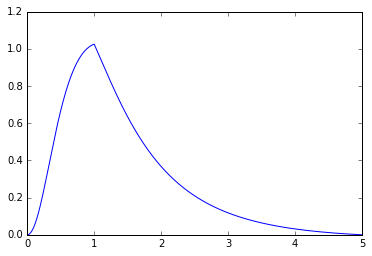

In [10]:
P = (1./np.sqrt(Norm))*np.array([(4.*np.pi*(DC(Z))**(2)*R(Z))*(1+Z)**(-1)*E(Z)**(-1) for Z in z])
plt.plot(z, P)
plt.show()

In [11]:
def P_CDF(z):
    P = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
    result = quad(P, 0, z)[0]
    return result

P_CDF(4.7)

1.5445878270040672

In [12]:
def P_CDFSquare(z):
    PSquare = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
    result = quad(PSquare, 0, z)[0]
    return result

P_CDFSquare(4.7)

3.0401648375422825

In [13]:
Norm_CDF = quad(P_CDFSquare,0,5)[0]
Norm_CDF

11.805189263572366

In [14]:
from scipy import interpolate
CDF_P = np.vectorize(P_CDF)
CDF_P(z)

array([0.00000000e+00, 1.73278648e-07, 1.39030931e-06, 4.70540168e-06,
       1.11830414e-05, 2.18964113e-05, 3.79259129e-05, 6.03576908e-05,
       9.02821633e-05, 1.28792563e-04, 1.76983490e-04, 2.35949481e-04,
       3.06783596e-04, 3.90576031e-04, 4.88412750e-04, 6.01374146e-04,
       7.30533735e-04, 8.76956876e-04, 1.04169954e-03, 1.22580708e-03,
       1.43031309e-03, 1.65623830e-03, 1.90458941e-03, 2.17635816e-03,
       2.47252025e-03, 2.79403442e-03, 3.14184159e-03, 3.51686395e-03,
       3.92000417e-03, 4.35214467e-03, 4.81414691e-03, 5.30685073e-03,
       5.83107372e-03, 6.38761073e-03, 6.97723330e-03, 7.60068925e-03,
       8.25870225e-03, 8.95197147e-03, 9.68117128e-03, 1.04469510e-02,
       1.12499345e-02, 1.20907205e-02, 1.29698817e-02, 1.38879655e-02,
       1.48454934e-02, 1.58429610e-02, 1.68808385e-02, 1.79595703e-02,
       1.90795750e-02, 2.02412463e-02, 2.14449522e-02, 2.26910358e-02,
       2.39798154e-02, 2.53115847e-02, 2.66866132e-02, 2.81051461e-02,
      

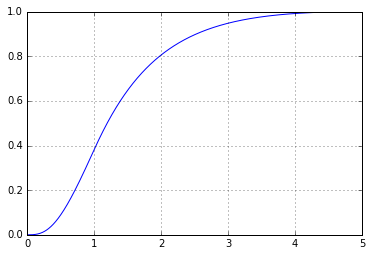

In [15]:
plt.plot(z, (1/np.amax(CDF_P(z)))*CDF_P(z))
plt.grid(True)
plt.show()

In [16]:
CDF_rand = np.sort(np.random.uniform(0,1, N))
CDF_rand

array([0.00143314, 0.00456398, 0.00470208, 0.00517751, 0.00521332,
       0.00728166, 0.00799017, 0.00802385, 0.00858112, 0.01131595,
       0.01198414, 0.01202112, 0.0122591 , 0.01241599, 0.01319898,
       0.0139678 , 0.01420856, 0.01468377, 0.01670118, 0.01735066,
       0.02140469, 0.02256823, 0.02333629, 0.02411064, 0.02430674,
       0.02514236, 0.02872391, 0.02934851, 0.02980623, 0.02992078,
       0.03109518, 0.03303055, 0.03396916, 0.03463514, 0.03545065,
       0.03689551, 0.03719477, 0.03821131, 0.04038561, 0.04155597,
       0.042331  , 0.04309051, 0.04393223, 0.04421137, 0.04460969,
       0.04471494, 0.04796189, 0.04835328, 0.05125771, 0.05165594,
       0.0521537 , 0.05713485, 0.05794773, 0.058189  , 0.05991565,
       0.06099769, 0.06184118, 0.06194014, 0.0641281 , 0.06482669,
       0.06534207, 0.06848718, 0.06946008, 0.0697455 , 0.07016639,
       0.07059912, 0.07184128, 0.07244252, 0.07411071, 0.07425268,
       0.07585897, 0.07641618, 0.07687078, 0.07816517, 0.08082

In [17]:
z_fid = np.interp(CDF_rand, (1/np.amax(CDF_P(z)))*CDF_P(z),z)
z_fid

array([0.11576697, 0.17078383, 0.17249723, 0.1782268 , 0.1786477 ,
       0.20022367, 0.20667492, 0.2069712 , 0.21180381, 0.23305146,
       0.23774675, 0.23800217, 0.23964574, 0.24071178, 0.24590177,
       0.25082221, 0.25231682, 0.25526633, 0.26708611, 0.27072534,
       0.29172559, 0.29731384, 0.300922  , 0.30448018, 0.3053793 ,
       0.30911991, 0.32444451, 0.32699901, 0.32885587, 0.32932053,
       0.33399877, 0.34150236, 0.34505998, 0.34753641, 0.35055697,
       0.35579533, 0.35686   , 0.36047422, 0.36800291, 0.37197288,
       0.37457195, 0.37708646, 0.37985656, 0.380768  , 0.38205496,
       0.38239504, 0.39271097, 0.39393133, 0.40281702, 0.40401718,
       0.40551549, 0.42005139, 0.42235571, 0.42303797, 0.42788335,
       0.43089061, 0.43320584, 0.43347747, 0.4394251 , 0.4413029 ,
       0.44267777, 0.45098352, 0.45350896, 0.45424988, 0.45534242,
       0.45645243, 0.4596345 , 0.46116556, 0.46538411, 0.46573962,
       0.46975057, 0.47113369, 0.47225486, 0.47544721, 0.48189

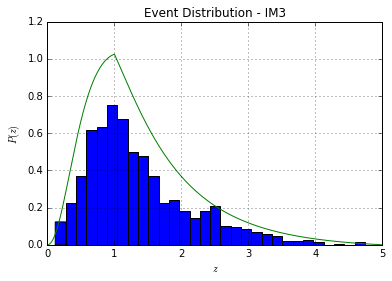

In [18]:
count, bins, ignored = plt.hist(z_fid, 30, normed=True)
plt.plot(z, P)
plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('$P(z)$')
plt.title('Event Distribution - IM3')
plt.savefig('eventdistributionIM3.png')
plt.show()

In [19]:
dl = np.array([(1 + Z)*DC(Z) for Z in z_fid])
dl

array([0.12740087, 0.19475383, 0.19690766, 0.20413251, 0.2046646 ,
       0.23217768, 0.24049052, 0.24087321, 0.2471263 , 0.27485685,
       0.28103427, 0.28137079, 0.28353754, 0.28494401, 0.29180363,
       0.29832534, 0.30030981, 0.30423069, 0.32000326, 0.32487829,
       0.35317057, 0.36074282, 0.36564114, 0.37047848, 0.37170189,
       0.37679616, 0.39773943, 0.40124141, 0.40378888, 0.4044266 ,
       0.41085259, 0.42117926, 0.42608361, 0.42950054, 0.43367153,
       0.44091343, 0.4423866 , 0.44739065, 0.45782961, 0.46334218,
       0.46695404, 0.47045052, 0.47430476, 0.47557345, 0.4773653 ,
       0.47783888, 0.49222118, 0.49392468, 0.50634071, 0.50801935,
       0.51011554, 0.53048126, 0.53371443, 0.53467193, 0.54147511,
       0.54570006, 0.54895407, 0.54933592, 0.5577006 , 0.56034299,
       0.56227811, 0.57397591, 0.57753521, 0.57857966, 0.58011995,
       0.58168508, 0.586173  , 0.58833296, 0.59428628, 0.59478812,
       0.60045127, 0.60240468, 0.60398835, 0.60849858, 0.61761

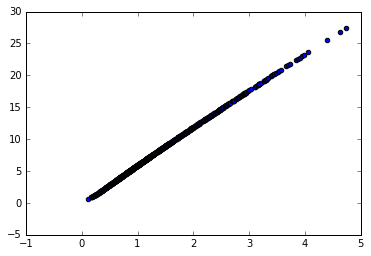

In [20]:
plt.scatter(z_fid, (h/3.)**(-1)*dl)
plt.show()

In [21]:
m = 5*np.log10((h/3000)**(-1)*dl)+25
m

array([38.72794918, 39.6495173 , 39.67340031, 39.75164813, 39.75730092,
       40.03118964, 40.10757707, 40.11102979, 40.16668209, 40.39762011,
       40.44588366, 40.44848236, 40.46514009, 40.47588496, 40.52754073,
       40.57553801, 40.58993489, 40.61810239, 40.72785932, 40.76069072,
       40.94200983, 40.98807579, 41.01736257, 41.04590221, 41.05306111,
       41.08261965, 41.20008049, 41.21911602, 41.23285903, 41.23628586,
       41.2705174 , 41.32442214, 41.34956142, 41.36690583, 41.38789186,
       41.42385392, 41.43109709, 41.45552178, 41.50560667, 41.53159648,
       41.54845796, 41.56465702, 41.58237471, 41.58817529, 41.59634149,
       41.59849469, 41.66288877, 41.6703909 , 41.7243015 , 41.73148853,
       41.74043004, 41.82543753, 41.83863199, 41.84252421, 41.86997979,
       41.88685729, 41.89976733, 41.90127725, 41.93409283, 41.94435698,
       41.95184315, 41.9965556 , 42.00997962, 42.01390308, 42.01967627,
       42.02552691, 42.04221633, 42.05020318, 42.0720658 , 42.07

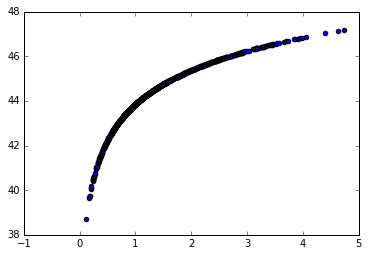

In [22]:
plt.scatter(z_fid, m)
plt.show()

In [23]:
q=0.03
N_BNS=(1/(1+q))*N
N_BHNS = N-int(N_BNS)
mass_1 =np.random.uniform(1,2, int(N_BNS))*M_solar
mass_2 = np.random.uniform(1,2, int(N_BNS))*M_solar
M_total1 = mass_1 + mass_2
eta1 =((mass_1*mass_2)/(M_total1**2))
M_chirp1 = M_total1*eta1**(3./5.)
#np.amax(mass_1/mass_2), np.amin(mass_1/mass_2)
mass_3 = np.random.uniform(1,2, N_BHNS)*M_solar
mass_4 = np.random.uniform(3,10, N_BHNS)*M_solar
M_total2 = mass_3+mass_4
eta2 =((mass_3*mass_4)/(M_total2**2))
M_chirp2 = M_total2*eta2**(3./5.)
M_total = np.concatenate((M_total1, M_total2), axis=None)
M_chirp = (1+z_fid)*np.concatenate((M_chirp1, M_chirp2), axis=None)
int(N_BNS)

970

In [24]:
phi_1 = np.random.uniform(0, 2*np.pi, N)
phi_2 = phi_1 + (2*np.pi/3.)
phi_3 = phi_1 + (4*np.pi/3.)
theta = np.random.uniform(0, np.pi, N)
psi = np.random.uniform(0, 2*np.pi, N)
F1_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.sin(2*psi))
F1_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.cos(2*psi))
Amp_1 = (H0/dl)*np.sqrt(4*F1_plus**2+4*F1_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)


In [25]:
# em Hz
f0 = 200
f_lower = 1.
M_obs = (1+z_fid)*M_total
f_LSO = (1./(6.**(3./2.)*2*np.pi*M_obs))
f_upper = 2*f_LSO
x_lower = f_lower/f0
x_upper = f_upper/f0

f = np.linspace(1,10**4, N)
x = f/f0

In [26]:
S0 = 1.449*10**(-52)
p1=-4.05
p2 = -0.69
a1 = 185.62
a2 = 232.56
b1=31.18
b2 = -64.72
b3 = 52.24
b4 = -42.16
b5 = 10.17
b6 = 11.53
c1 = 13.58
c2 = -36.46
c3 = 18.56
c4 = 27.43
def S_h(x):
    return S0*(x**p1 + a1*x**p2 + a2*((1+ b1*x + b2*x**2 + b3*x**3+b4*x**4 + b5*x**5 + b6*x**6)/(1 + c1*x + c2*x**2 + c3*x**3+c4*x**4)))
S_h(239)


8.097623759624806e-46

In [27]:
def h_1(x):
    return Amp_1*(f0*x)**(-7./6.)

In [28]:
rho_1 = np.zeros(len(Amp_1))
for i in range(len(Amp_1)):
    integ_H = lambda y: (4.*f0*(Amp_1[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_1[i] = np.sqrt(quad(integ_H, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_1

array([3.15020172e+00, 4.71453751e+01, 2.41080921e+01, 1.33548865e+01,
       3.37286247e+01, 4.01156633e+01, 9.02627236e+00, 5.74576393e+00,
       5.49465638e+01, 1.97036398e+01, 3.90821010e+01, 3.07798770e+01,
       2.41357979e+01, 1.06364363e+01, 3.96347951e+01, 4.99475596e+01,
       1.63981881e+01, 2.83899299e+01, 2.90136766e+01, 4.57962614e+01,
       7.64466735e+00, 2.12255997e+01, 4.23979557e+01, 1.61705716e+01,
       3.77752211e+01, 4.27123005e+01, 3.87976130e+01, 3.87951462e+01,
       2.48680372e+00, 3.60071567e+01, 9.35450999e+00, 1.57459987e+01,
       1.78343395e+01, 3.68774329e+01, 2.31496211e+01, 1.92977373e+01,
       5.65673782e+00, 3.57565756e+01, 2.46999824e+01, 2.56774117e+01,
       3.01049652e+01, 2.04802333e+00, 3.69383444e+01, 1.89963271e+01,
       2.08905751e+01, 4.21815526e+00, 2.15102809e+01, 2.09000408e+01,
       1.95393799e+01, 1.14367966e+01, 1.94192112e+01, 3.92169568e+00,
       1.39468452e+01, 3.01967151e+01, 1.75286617e+00, 1.22242002e+01,
      

In [29]:
F2_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.sin(2*psi))
F2_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.cos(2*psi))
Amp_2 = (H0/dl)*np.sqrt(4*F2_plus**2+4*F2_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [30]:
def h_2(x):
    return Amp_2*(f0*x)**(-7./6.)

In [31]:
rho_2 = np.zeros(len(Amp_2))
for i in range(len(Amp_2)):
    integ_2 = lambda y: (4.*f0*(Amp_2[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_2[i] = np.sqrt(quad(integ_2, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_2

array([2.65431455e+01, 3.77226303e+00, 4.62752312e+01, 5.01169588e+01,
       5.75125161e+01, 7.30582674e+00, 3.71013300e+01, 3.12888820e+01,
       3.06883546e+01, 6.49887000e+01, 1.58594576e+01, 1.04336535e+01,
       2.27073019e+01, 4.62608572e+01, 4.21147332e+01, 1.48660989e+01,
       1.68665728e+01, 1.47323361e+01, 2.95824631e+01, 1.21564847e+00,
       3.40697710e+01, 2.40691210e+01, 1.37904736e+01, 8.91360169e+00,
       8.57681251e+00, 1.15940001e+01, 2.49449755e+01, 2.29329845e+01,
       1.13546955e+01, 3.30652594e+01, 1.49732493e+01, 1.86422530e+00,
       1.60076269e+01, 2.26673275e+00, 4.09872769e+00, 1.04753666e+01,
       2.69538820e+01, 3.57669514e+01, 1.69950776e+01, 1.78291866e+01,
       4.79473452e+00, 1.68836233e+01, 5.99731097e+00, 2.48350500e+00,
       9.19294512e-01, 3.28899109e+01, 3.97411237e+01, 1.02645029e+01,
       1.51048210e-01, 2.18947034e+01, 2.08745552e+01, 8.43349493e+00,
       3.99686672e+00, 2.64612686e+01, 1.28347866e+01, 2.16598863e+01,
      

In [32]:
F3_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.sin(2*psi))
F3_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.cos(2*psi))
Amp_3 = (H0/dl)*np.sqrt(4*F3_plus**2+4*F3_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [33]:
def h_3(x):
    return Amp_3*(f0*x)**(-7./6.)

In [34]:
rho_3 = np.zeros(len(Amp_3))
for i in range(len(Amp_3)):
    integ_3 = lambda y: (4.*f0*(Amp_3[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_3[i] = np.sqrt(quad(integ_3, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_3

array([2.96933473e+01, 4.33731121e+01, 7.03833232e+01, 6.34718453e+01,
       2.37838914e+01, 3.28098366e+01, 4.61276023e+01, 2.55431181e+01,
       2.42582092e+01, 4.52850602e+01, 5.49415587e+01, 4.12135305e+01,
       1.42849596e+00, 3.56244209e+01, 2.47993806e+00, 3.50814607e+01,
       3.32647609e+01, 1.36575938e+01, 5.68786474e-01, 4.70119099e+01,
       2.64251037e+01, 2.84352134e+00, 2.86074821e+01, 2.50841733e+01,
       2.91984086e+01, 3.11183004e+01, 1.38526375e+01, 1.58621617e+01,
       1.38414992e+01, 2.94189726e+00, 2.43277593e+01, 1.76102240e+01,
       3.38419664e+01, 3.46107001e+01, 1.90508934e+01, 2.97731039e+01,
       3.26106198e+01, 1.03758168e-02, 7.70490489e+00, 7.84822503e+00,
       3.48996997e+01, 1.48356000e+01, 4.29356554e+01, 1.65128221e+01,
       2.18098696e+01, 2.86717556e+01, 1.82308428e+01, 3.11645437e+01,
       1.96904281e+01, 1.04579068e+01, 1.45534407e+00, 1.23551906e+01,
       1.79437120e+01, 3.73544646e+00, 1.10819204e+01, 9.43568613e+00,
      

In [35]:
rho_tot = np.sqrt(rho_1**2+rho_2**2+rho_3**2)
rho_tot[rho_tot < 8.0] = np.random.uniform(8., 20.)
rho_tot

array([39.95193634, 64.17276072, 87.61512035, 81.96790654, 70.78829797,
       52.336669  , 59.88103183, 40.79777962, 67.44894882, 81.62414604,
       69.26404468, 52.4863511 , 33.16924632, 59.34896842, 57.88538524,
       62.82092398, 40.7421915 , 34.77872508, 41.43958338, 65.64217417,
       43.78899793, 32.21698748, 52.97312382, 31.1473182 , 48.50851587,
       54.10277327, 48.16017178, 47.77649336, 18.07485558, 48.974294  ,
       30.05902395, 23.6966622 , 41.46789688, 50.62591924, 30.25956156,
       36.99423852, 42.68445812, 50.57477257, 30.95621671, 32.23048251,
       46.33883301, 22.56869873, 56.95506588, 25.29232163, 30.21475866,
       43.83615678, 48.72794602, 38.90244862, 27.74028006, 26.82435777,
       28.5476942 , 15.46461343, 23.07522989, 40.32361465, 17.04738237,
       26.60101345, 22.3648346 , 43.60749568, 25.41237794, 41.77582416,
       37.89516614, 40.98077898, 44.88329614, 24.31274926, 32.5940152 ,
       34.62909961, 14.66347506, 41.072835  , 27.39861769, 27.15

In [36]:
sigma_dl = np.sqrt(((2*dl)/rho_tot)**2 +(0.05*z_fid*dl)**2)
np.amax(sigma_dl), np.amin(sigma_dl)

(2.0468198186602238, 0.004804971276732843)

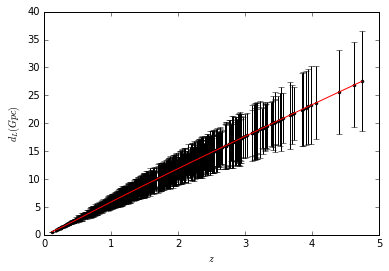

In [38]:
plt.errorbar(z_fid, (h/3)**(-1)*dl, (h/3)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid, (h/3)**(-1)*dl, 'r')
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.ylim((0,100))
plt.show()

In [39]:
m_err = (5./np.log(10))*(sigma_dl/dl)
np.amax(m_err), np.amin(m_err)

(0.7061931431879588, 0.05298860730694156)

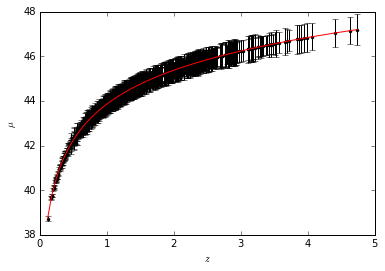

In [40]:
plt.errorbar(z_fid, m, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [41]:
dl_fid = np.sqrt((np.random.normal(dl, sigma_dl))**2)
#dl = np.array([(1 + Z)*DC(Z) for Z in z_eff]) + np.random.normal(0, sigma_dl, N)
np.amin(dl_fid), np.amax(dl_fid)

(0.1278398566873601, 8.365376849218011)

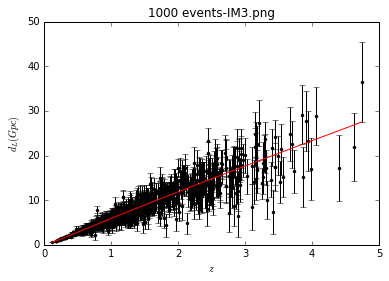

In [43]:
plt.errorbar(z_fid, (h/3)**(-1)*dl_fid, (h/3)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid,(h/3)**(-1)*dl, 'r' )
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.savefig('dL(z)-500vents_IM3')
#plt.ylim((0,00))
plt.title('1000 events-IM3.png')
plt.show()

In [44]:
m_fid = np.random.normal(m, m_err, N)
#mu = 5*np.log10((h/3000)**(-1)*dl)+25
np.amax(m_fid), np.amin(m_fid)
#len(mu_fid)/

(47.8309754652465, 38.7790084977977)

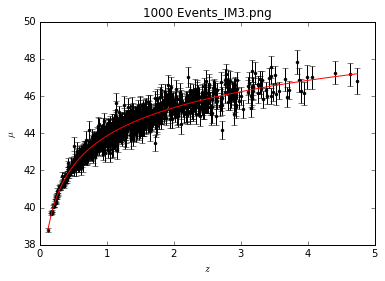

In [45]:
plt.errorbar(z_fid, m_fid, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
#plt.savefig('mu(z)-500Events-IM3')
#plt.ylim((40,55))
plt.title('1000 Events_IM3.png')
plt.show()


In [44]:
#definir likelihood
c=3.e5
def lnlike(theta, z_fid, m_fid, m_err):
    Om_m, H_0, w, lamb = theta
    def DL(zz, Om_m, H_0, w, lamb):
        E = lambda zz : np.sqrt( 0.5*(1.+ (w/np.sqrt(w*(w+4*lamb)))*(2*Om_m-1.))*(1+zz)**(-3*(-1.-(w/2.) + np.sqrt(w*(w+4*lamb)))) + 0.5*(1.- (w/np.sqrt(w*(w+4*lamb)))*(2*Om_m-1.))*(1+zz)**(-3*(-1.-(w/2.) - np.sqrt(w*(w+4*lamb)))))**(-1)
        result = quad(E, 0, zz)[0]
        return result

    dl = (c/H_0)*np.array([(1 + Z) * DL(Z, Om_m, H_0, w, lamb) for Z in z_fid])
    

    mu = 5*np.log10(dl)+25
    
    result = -0.5 * np.sum((m_fid-mu)**2/m_err**2)
    # print result 
    return result


In [45]:
#priors

def lnprior(theta):
    Om_m, H_0, w, lamb = theta
    if 0.0 <= Om_m <= 1.0  and 20.0 <= H_0 <= 100.0 and -1.5 <= w <= -1.01 and -0.2 <= lamb <= 0.2:
        return 0.0
    return -np.inf

In [46]:
#posterior

def lnprob(theta, z_fid, m_fid, m_err):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, z_fid, m_fid, m_err)

In [47]:
#cadeia de Markov

set_ini = 0.3, 70.0, -1.01, 0.1 

ndim, nwalkers = 4, 16
pos = [set_ini + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(z_fid, m_fid, m_err))
sampler.run_mcmc(pos, 4000, progress=True)

samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

np.savetxt("chainInt3_1000events.txt",samples)

  0%|          | 0/4000 [00:00<?, ?it/s]/home/riisrhavia/.local/lib/python2.7/site-packages/emcee/moves/red_blue.py:97: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 4000/4000 [9:15:36<00:00,  6.48s/it]     


In [48]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [49]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc

((0.3297675147860505, 0.03842953896343876, 0.03927993763098403),
 (68.56585530963686, 0.5325604229103504, 0.5494556960626369),
 (-1.172396737379614, 0.12254339077168974, 0.18168921539137872),
 (0.02589168397799333, 0.057703632415300486, 0.044831548701774))

/home/riisrhavia/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/riisrhavia/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


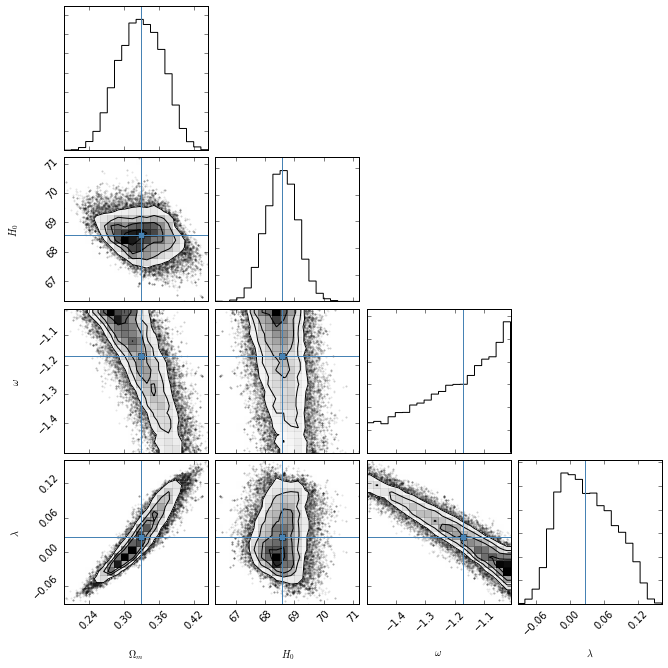

In [50]:
fig = corner.corner(samples, labels=["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"],
                    truths=[Om_m_mcmc[0], H_0_mcmc[0], w_mcmc[0], lamb_mcmc[0]])
fig.savefig("ParametersIm3_1000.png")
fig.show()

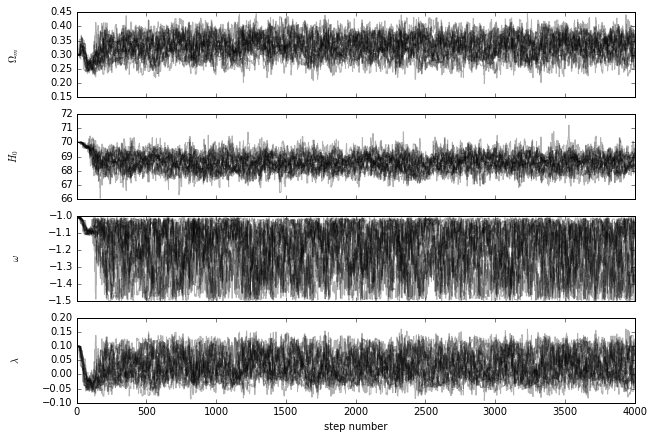

In [51]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [52]:
tau = sampler.get_autocorr_time()
print(tau)

[70.25598866 59.44149515 75.94857975 68.95057607]


In [60]:
50*70.29809466, 50*62.48702336, 50* 71.2639118, 50*52.66995348

(3514.9047330000003, 3124.351168, 3563.1955900000003, 2633.4976739999997)

In [46]:
np.savetxt('SS_1000.txt', np.transpose([z_fid, m_fid, m_err]))